In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

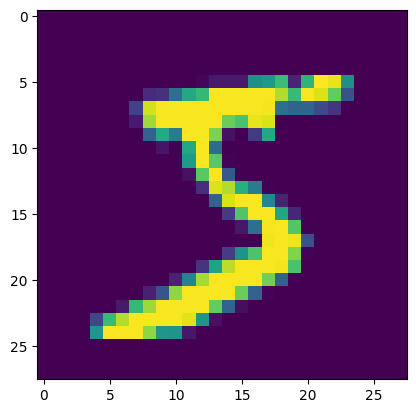

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,314 (930.91 KB)

 Trainable params: 238,314 (930.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(X_train,y_train,batch_size=1500,epochs=100,verbose=1,validation_data=(X_test, y_test))

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9977 - loss: 0.0102 - val_accuracy: 0.9814 - val_loss: 0.1458
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9993 - loss: 0.0022 - val_accuracy: 0.9815 - val_loss: 0.1423
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9820 - val_loss: 0.1502
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9997 - loss: 8.6621e-04 - val_accuracy: 0.9824 - val_loss: 0.1530
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9999 - loss: 4.4653e-04 - val_accuracy: 0.9815 - val_loss: 0.1595
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9998 - loss: 5.9470e-04 - val_accuracy: 0.9818 - val_loss: 0.1569
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9998 - loss: 5.1677e-04 - val_accuracy: 0.9819 - val_loss: 0.1578
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9997 - loss: 7.0883e-0

In [35]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [36]:
import numpy as np
import pandas as pd

In [37]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, y_pred.argmax(axis=1))

0.9819

In [42]:
import pickle
pickle.dump(model, open('mnist_model.pkl', 'wb'))

In [47]:
import pickle
model=pickle.load(open('mnist_model.pkl', 'rb'))

from PIL import Image
image=Image.open("images.png")

gray_image=image.convert('L')
resized_image=gray_image.resize((28,28))
resized_image.show()
resized_image.save("resized_gray_image.jpg")
image_array=np.array(resized_image)
image_array=image_array.reshape(1,28,28)

prediction=model.predict(image_array)
print(np.argmax(prediction))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
5
